In [1]:
# !pip install pymc3

In [8]:
# !pip uninstall -y numpy

Found existing installation: numpy 1.22.3
Uninstalling numpy-1.22.3:
  Successfully uninstalled numpy-1.22.3


In [4]:
# !pip uninstall -y setuptools

Found existing installation: setuptools 62.0.0
Uninstalling setuptools-62.0.0:
  Successfully uninstalled setuptools-62.0.0


In [11]:
# !pip install setuptools

In [10]:
# !pip install numpy==1.21.4

     ---------------------------------------- 14.0/14.0 MB 7.2 MB/s eta 0:00:00


In [1]:
import warnings

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import theano.tensor as tt

warnings.simplefilter(action="ignore", category=FutureWarning)

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
print(f"Running on PyMC3 v{pm.__version__}")
print(f"Running on ArviZ v{az.__version__}")

Running on PyMC3 v3.11.5
Running on ArviZ v0.12.0


In [4]:
with pm.Model() as model:
    mu = pm.Normal("mu", mu=0, sigma=1)
    obs = pm.Normal("obs", mu=mu, sigma=1, observed=np.random.randn(100))

In [5]:
model.basic_RVs

[mu ~ Normal, obs ~ Normal]

In [6]:
model.free_RVs

[mu ~ Normal]

In [7]:
model.observed_RVs

[obs ~ Normal]

In [8]:
model.logp({"mu": 0})

array(-140.99352964)

In [13]:
%timeit model.logp({mu: 0.1})
logp = model.logp
%timeit logp({mu: 0.1})

57.9 ms ± 3.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
14.3 µs ± 1.77 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [15]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + np.random.randn(size) * sigma

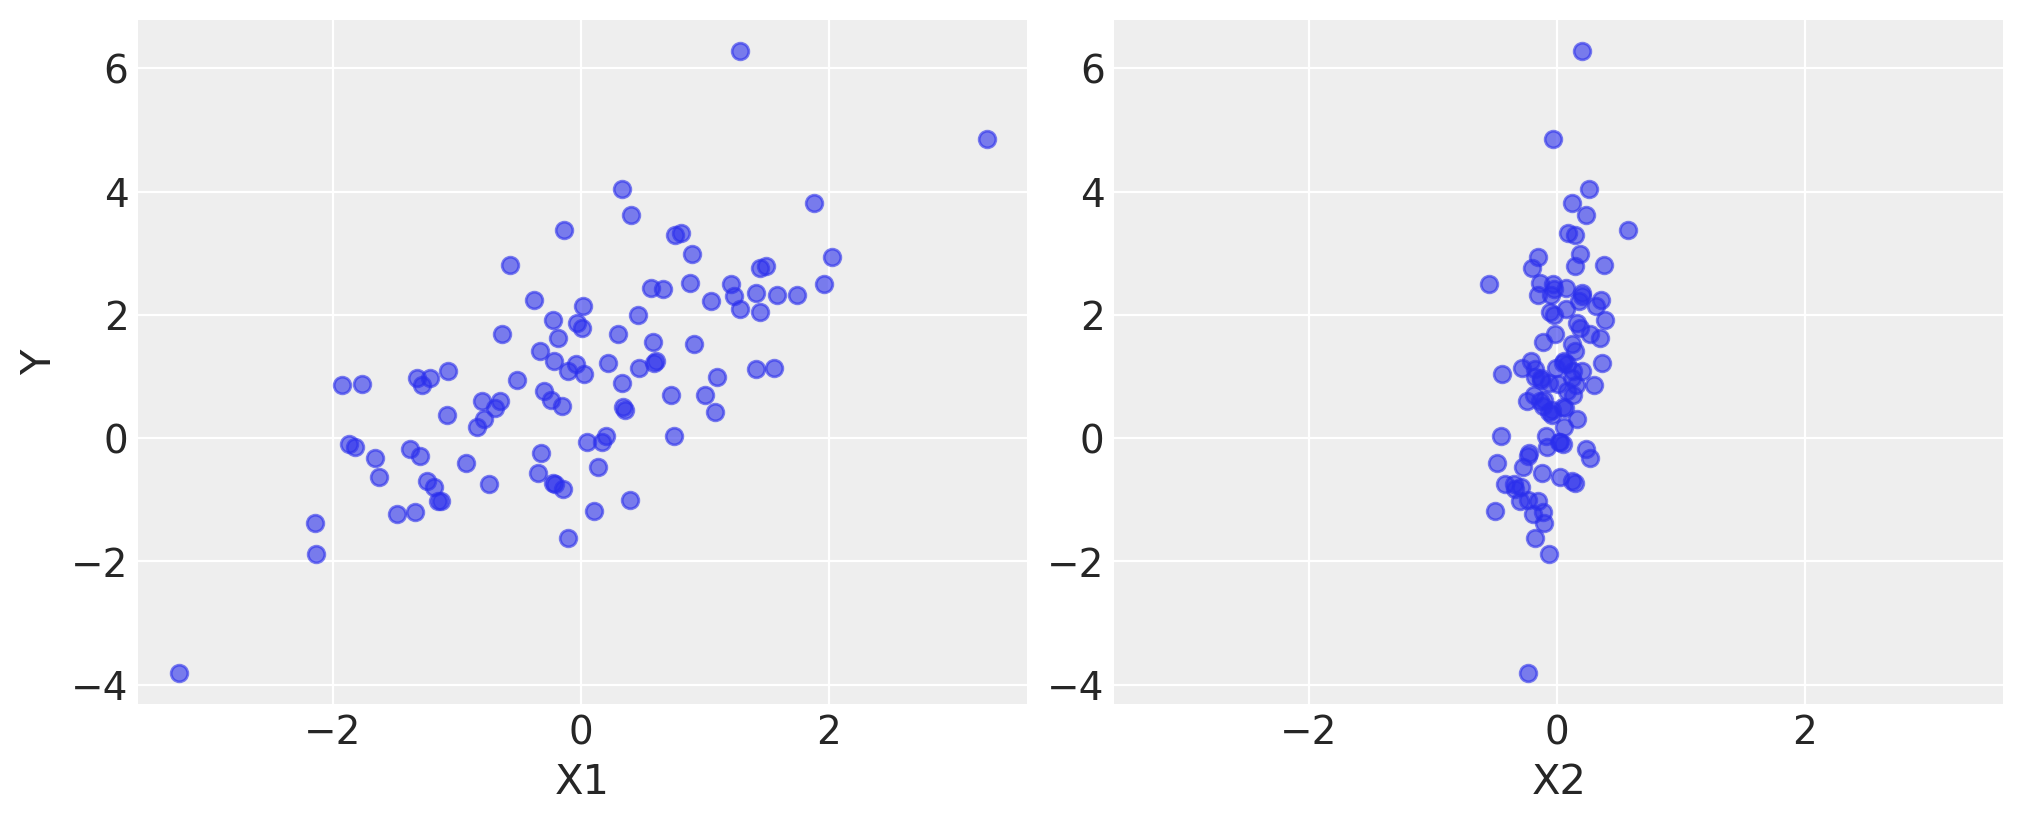

In [16]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");

In [17]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [18]:
map_estimate = pm.find_MAP(model=basic_model)
map_estimate

{'alpha': array(1.057995),
 'beta': array([0.95644851, 3.22715016]),
 'sigma_log__': array(-0.10941448),
 'sigma': array(0.89635882)}

In [19]:
map_estimate = pm.find_MAP(model=basic_model, method="powell")
map_estimate

C:\Users\dlaa0001\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method powell does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


{'alpha': array(1.06067476),
 'beta': array([0.95834722, 3.23337107]),
 'sigma_log__': array(-0.10696787),
 'sigma': array(0.89855454)}

In [1]:
import bnlearn as bn

C:\Users\dlaa0001\Anaconda3\envs\pymc_env\lib\site-packages\torch\_masked\__init__.py:223: UserWarning: Failed to initialize NumPy: module compiled against API version 0xf but this version of numpy is 0xe (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:68.)
  example_input = torch.tensor([[-3, -2, -1], [0, 1, 2]])


In [2]:
import pymc3 as pm

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
